In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from wrangle import wrangle_telco
import split_scale

# Initial Exploration

In [34]:
tc_df = wrangle_telco()
tc_df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [ ]:
tc_df.hist()

In [ ]:
sns.distplot(tc_df.monthly_charges)

In [ ]:
sns.distplot(tc_df.total_charges)

In [ ]:
sns.distplot(tc_df.tenure)

In [ ]:
tc_df.corr()

- it looks like there are two groups in the dataset, from the distplot of monthly and total charges

- monthly_charges is highly correlated with total_charges

# Functions from exercises

### Write a function, plot_variable_pairs(dataframe) that plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
sns.pairplot(tc_df, kind='reg')

In [48]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}})

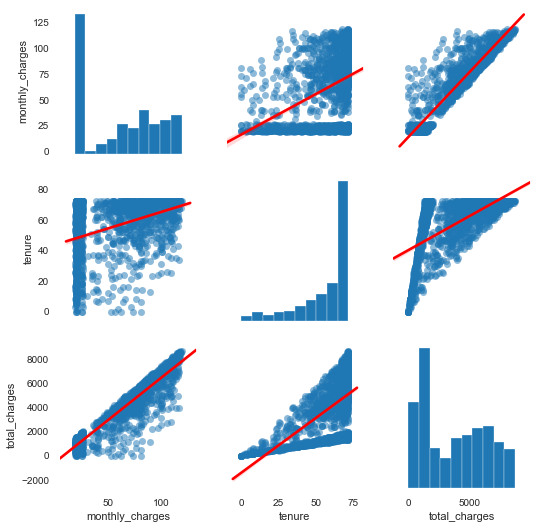

In [49]:
plot_variable_pairs(tc_df)

### Write a function, months_to_years(tenure_months, df) that returns your dataframe with a new feature tenure_years, in complete years as a customer.

In [ ]:
tc_df['tenure_years'] = (tc_df.tenure / 12).round(decimals=0).astype(int)
tc_df.head()

In [3]:
def months_to_years(tenure_months, df):
    new_df = df.copy()
    new_df['tenure_years'] = (tenure_months / 12).round(decimals=0).astype(int)
    return new_df

In [4]:
new_tc_df = months_to_years(tc_df.tenure, tc_df)
new_tc_df

,monthly_charges,tenure,total_charges,tenure_years
customer_id,,,,
0013-SMEOE,109.70,71,7904.25,6
0014-BMAQU,84.65,63,5377.80,5
0016-QLJIS,90.45,65,5957.90,5
0017-DINOC,45.20,54,2460.55,4
0017-IUDMW,116.80,72,8456.75,6
...,...,...,...,...
9964-WBQDJ,24.40,71,1725.40,6
9972-EWRJS,19.25,67,1372.90,6
9975-GPKZU,19.75,46,856.50,4


In [ ]:
tc_df.head()

### Write a function, plot_categorical_and_continous_vars(categorical_var, continuous_var, df), that outputs 3 different plots for plotting a categorical variable with a continuous variable, e.g. tenure_years with total_charges. 

In [ ]:
x = new_tc_df.tenure_years
y = new_tc_df.total_charges
data = new_tc_df
x, y

In [ ]:
# try a kdeplot

sns.kdeplot(x, y, cmap='Reds', shade=True)

In [ ]:
# try a box plot

sns.boxplot(x, y, data=data)

In [ ]:
# try a barplot

sns.barplot(x, y, data=data)

In [ ]:
plt.figure(figsize=(14, 10))
plt.suptitle(f'{x} vs {y}')

plt.subplot(311)
sns.kdeplot(x, y, cmap=cmap, shade=True)
plt.title('Kernel Density Estimation')

plt.subplot(312)
sns.barplot(x, y, data=data, cmap=cmap)
plt.title('Barplot')

plt.subplot(313)
sns.boxplot(x, y, data=data, cmap=cmap)
plt.title('Boxplot')

In [ ]:
plt.figure(figsize=(14, 10))
plt.suptitle(f'{x} vs {y}')

plt.subplot(311)
sns.swarmplot(x, y, data=data)
plt.title('swarm')

plt.subplot(312)
sns.barplot(x, y, data=data)
plt.title('Barplot')

plt.subplot(313)
sns.boxplot(x, y, data=data)
plt.title('Boxplot')

In [ ]:
x = new_tc_df.tenure_years
y = new_tc_df.total_charges
data = new_tc_df

plt.figure(figsize=(14, 10))
fig, ax = plt.subplots(3, sharex='col', sharey='row')

ax[0].plot(sns.barplot(x, y, data=data))
ax[0].set(title='Barplot')

ax[1].plot(sns.boxplot(x, y, data=data))
ax[1].set(title='Boxplot')

ax[2].plot(sns.kdeplot(x, y, cmap='Reds', shade=True))
ax[2].set(title='Kernel Density Estimation')

In [26]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    """
    Takes:
          df
    Returns:
          three plots of categorical var with continuous var
    """
    plt.suptitle(f'{continuous_var} by {categorical_var}', fontsize=18)
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind = "boxen", palette='bright')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    plt.show()
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="swarm", palette='bright')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    plt.show()
    
    sns.catplot(x=categorical_var, y=continuous_var, data=df, kind="bar", palette='bright')
    plt.xlabel(categorical_var, fontsize=12)
    plt.ylabel(continuous_var, fontsize=12)
    plt.show()

<Figure size 432x288 with 0 Axes>

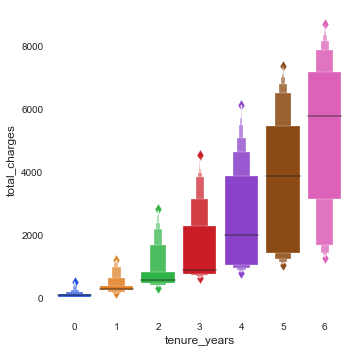

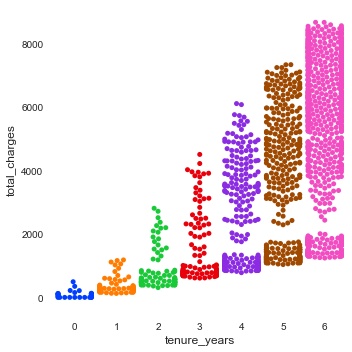

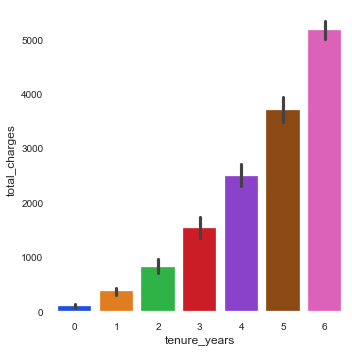

In [29]:
plot_categorical_and_continuous_vars('tenure_years', 'total_charges', new_tc_df)